<a href="https://colab.research.google.com/github/Yash-Kamtekar/Clustering-techniques/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means clustering**

import libraries.

In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

mounting drive

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


import data from google drive using pandas

In [3]:
df = pd.read_csv('/content/drive/MyDrive/255/Assignment_4/shopping.csv')
df

,Shopper,Spending Index,Income Index
0,1,3,5
1,2,3,4
2,3,5,6
3,4,2,6
4,5,4,5
5,6,6,8
6,7,6,2
7,8,6,3
8,9,5,6
9,10,6,7


just keeping Spending Index & Income Index values in the data frame

In [4]:
df = df[['Spending Index', 'Income Index']]

visualise the data

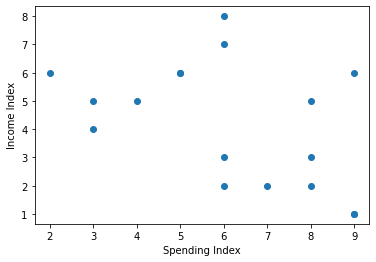

In [5]:
plt.scatter(df['Spending Index'], df['Income Index'])
plt.xlabel('Spending Index')
plt.ylabel('Income Index')
plt.show()

Elbow Plot

The technique to determine K, the number of clusters.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  


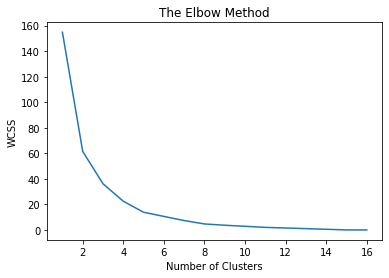

In [6]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1, len(df)):
    kmeans=KMeans(n_clusters = i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, len(df)), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

lets visualise for k = 3

In [7]:
kmeans = KMeans(n_clusters = 5)
y_predicted = kmeans.fit_predict(df)
y_predicted

array([0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 1, 4, 3, 3, 4, 3, 3], dtype=int32)

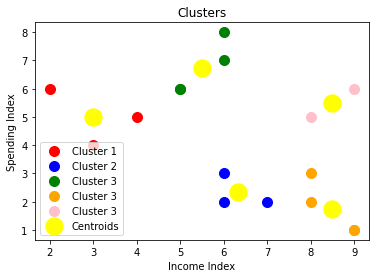

In [10]:
plt.scatter(df[y_predicted == 0]['Spending Index'], df[y_predicted == 0]['Income Index'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df[y_predicted == 1]['Spending Index'], df[y_predicted == 1]['Income Index'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df[y_predicted == 2]['Spending Index'], df[y_predicted == 2]['Income Index'], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(df[y_predicted == 3]['Spending Index'], df[y_predicted == 3]['Income Index'], s = 100, c = 'orange', label = 'Cluster 3')
plt.scatter(df[y_predicted == 4]['Spending Index'], df[y_predicted == 4]['Income Index'], s = 100, c = 'pink', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.ylabel('Spending Index')
plt.xlabel('Income Index')
plt.legend()
plt.show()